In [3]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from threading import Timer
#from Quarto import *
#from keras_sequential_ascii import sequential_model_to_ascii_printout

# Basic algo 

In [4]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output/losses.txt')

Epochs: 878900
Selected: 878800
1) Mean: 4015.22833084
Std: 1908.58840825


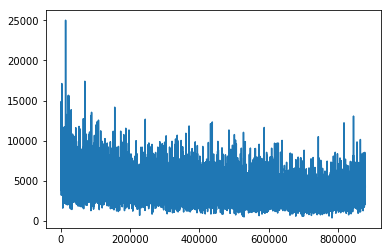

[ 7412.34960938  1681.64331055  2133.39013672  3045.2734375   3081.10302734
  5423.48535156  5968.81640625  2082.82958984  3039.07519531  6755.62792969
  4358.04150391  2343.18994141  4048.69628906  3463.99316406  5286.16601562
  4825.54882812  4526.06347656  4278.015625    3816.78930664  3102.35107422
  5473.37304688  1727.62817383  1775.24853516  2902.16162109  5593.703125
  2542.55493164  3037.8215332   5814.77050781  4325.8046875   3759.79296875
  4768.98095703  3189.66064453  5877.65527344  3257.94970703  8533.36523438
  6004.83740234  4749.02832031  2849.55126953  2328.93408203  2860.47851562
  2012.25634766  3092.10449219  2461.67236328  5048.14160156  2722.34643555
  3047.79345703  4232.68212891  4916.44433594  4837.14941406  4247.99462891]


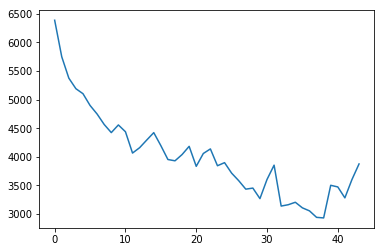

In [6]:
i = 100
data = np.array([float(x) for x in r.text.split("\n")[500:]])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 200
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

# Prioritized Experience Replay

In [7]:
r = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses.txt')

Epochs: 598900
Selected: 498900
1) Mean: 8724.99306005
Std: 2015.89918602


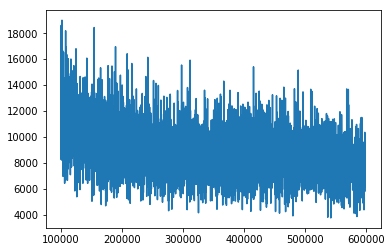

[  8004.92382812   5862.13330078   6724.21875      7679.93212891
   6052.50878906   6693.25048828   6324.42382812   8845.1796875
   8374.79296875   5819.22363281   4911.53027344   5767.76464844
   7969.796875     8001.72167969   9574.046875     9548.47363281
   5414.90917969   6518.72753906   8101.40820312   9400.8984375
   7421.47070312   5835.40625      5577.62402344   7818.94433594
   7679.54052734   7437.34716797   5681.86621094   6391.11376953
   4386.72705078   8803.26464844   7403.6484375    6056.48291016
   9616.70507812   7661.96679688   6762.11425781   9051.61328125
   6817.79003906   8109.63134766   6160.56396484   6664.89599609
   5796.12304688  10355.8554688    6950.62695312   8118.546875
   6298.36914062   9193.68359375   6279.20605469   8936.11816406
   6174.01171875   8894.9765625 ]


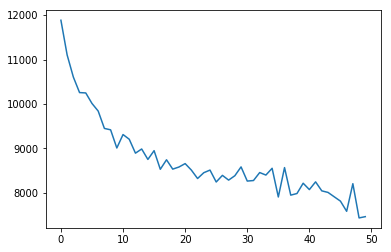

In [8]:
text = r.text
#with open("output/losses.txt") as file:
#    text = file.read()
i = 100000
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 100
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [9]:
s = requests.get('http://srv.lucatoma.eu/valsdav/output-v3/losses_details.txt')

In [10]:

#with open("output/losses_details.txt") as file:
#    text = file.read()
cut = False

text = s.text
losses = []
pieces = []
rewards = []
data = np.array([x.split(" ") for x in text.split("\n")])
for d in data[:-1]:
    losses.append(float(d[0]))
    rewards.append(int(d[1]))
    pieces.append(int(d[2]))

if cut:
    if len(losses)> 16000:
        losses = losses[-16000:]
        rewards = rewards[-16000:]
        pieces = pieces[-16000:]
    
lo = np.array(losses) 
print(len(rewards), len(lo[lo<5000]), len(lo[lo>50000]))

191648 84565 3094


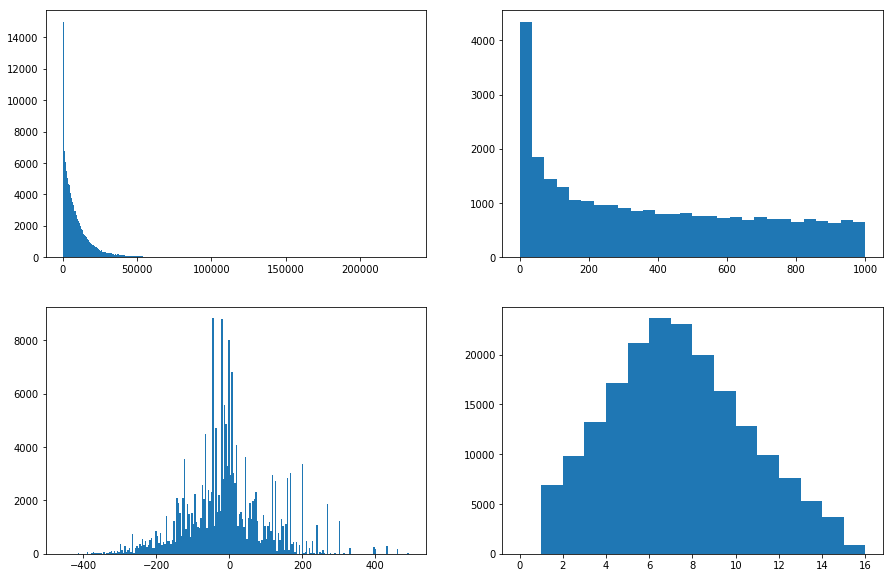

In [11]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].hist(losses,'auto')
xarr[0,1].hist(lo[lo<1000],'auto')
xarr[1,0].hist(rewards,'auto')
xarr[1,1].hist(pieces,range(17))
plt.show()

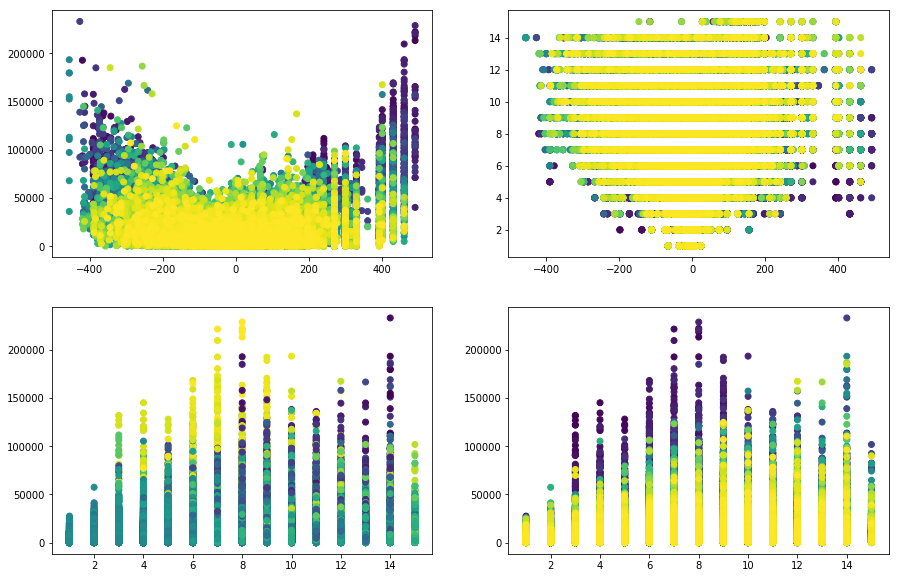

In [12]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards, losses, c=range(len(pieces)))
xarr[0,1].scatter(rewards, pieces,c=range(len(pieces)))
xarr[1,0].scatter(pieces, losses,c=rewards)
xarr[1,1].scatter(pieces, losses,c=range(len(rewards)))
plt.show()

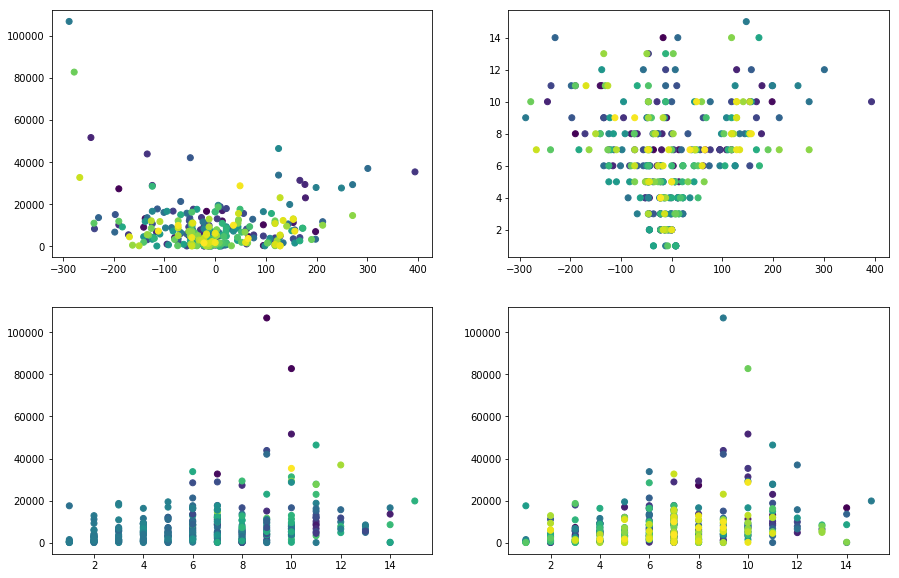

In [13]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards[-320:], losses[-320:], c=range(320))
xarr[0,1].scatter(rewards[-320:], pieces[-320:],c=range(320))
xarr[1,0].scatter(pieces[-320:], losses[-320:],c=rewards[-320:])
xarr[1,1].scatter(pieces[-320:], losses[-320:],c=range(320))
plt.show()

# Smaller reward test

Epochs: 990
Selected: 390
1) Mean: 50.6128939629
Std: 12.6206357881


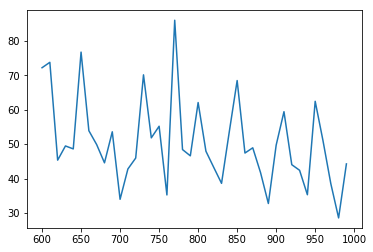

[ 72.21533203  73.7881012   45.33987045  49.4676857   48.60710907
  76.7545166   53.8987999   49.85966492  44.55991364  53.5806694
  33.95409393  42.76434326  45.94357681  70.14507294  51.82073975
  55.19909286  35.22176361  86.02006531  48.41409302  46.59313965
  62.08825684  47.92963791  43.23744965  38.59375381  53.70188904
  68.48045349  47.40625     48.92507172  41.69568634  32.73119736
  49.70323181  59.42733002  44.01914215  42.38775253  35.282341
  62.44882584  50.9955368   38.52629852  28.53985596  44.24815369]


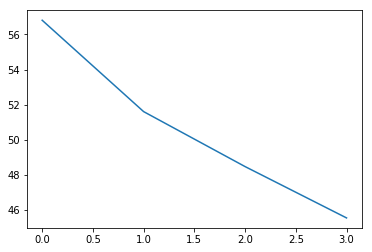

In [22]:
with open("output/losses.txt") as file:
    text = file.read()
i = 600
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*10))
print("Selected: {}".format((len(data)*10 - i)))
data1 = data[int(i*0.1)-1:]
index = list(range(i, (len(data)+1)*10,10))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 10
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [23]:
with open("output/losses_details.txt") as file:
    text = file.read()
    
losses = []
pieces = []
rewards = []
data = np.array([x.split(" ") for x in text.split("\n")])
for d in data[:-1]:
    losses.append(float(d[0]))
    rewards.append(float(d[1]))
    pieces.append(int(d[2]))

#if len(losses)> 16000:
#    losses = losses[-16000:]
#    rewards = rewards[-16000:]
#    pieces = pieces[-16000:]
    
lo = np.array(losses) 
print(len(rewards), len(lo[lo<10]), len(lo[lo>100]))

288 88 48


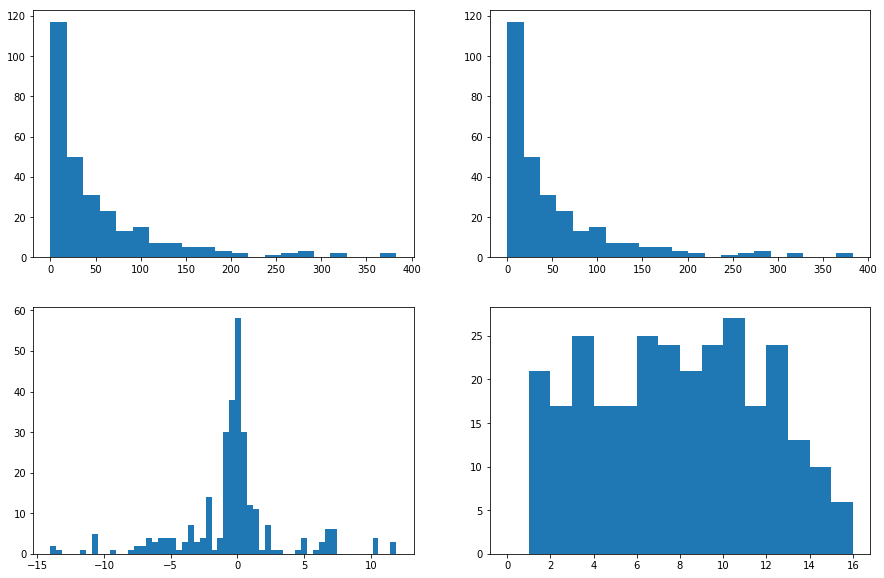

In [24]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].hist(losses,'auto')
xarr[0,1].hist(lo[lo<1000],'auto')
xarr[1,0].hist(rewards,'auto')
xarr[1,1].hist(pieces,range(17))
plt.show()

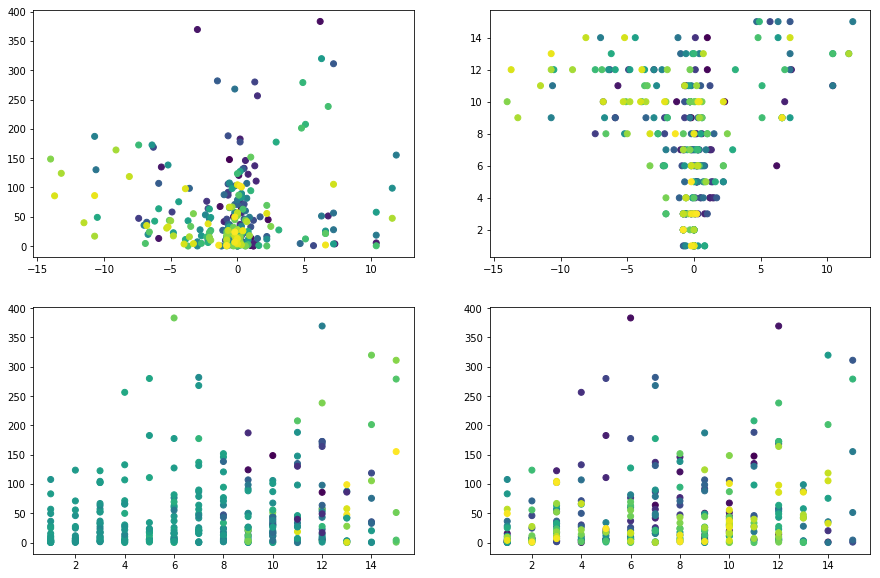

In [25]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards, losses, c=range(len(pieces)))
xarr[0,1].scatter(rewards, pieces,c=range(len(pieces)))
xarr[1,0].scatter(pieces, losses,c=rewards)
xarr[1,1].scatter(pieces, losses,c=range(len(rewards)))
plt.show()

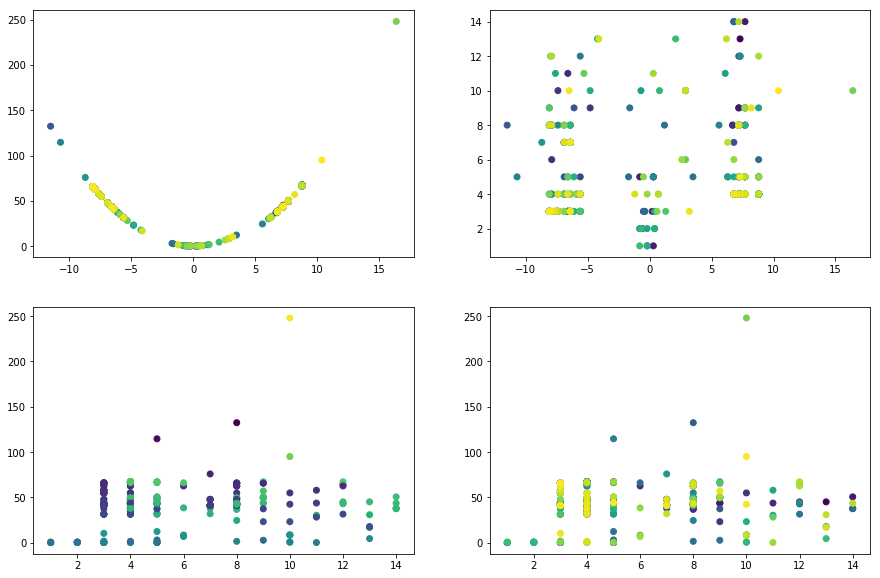

In [19]:
f, xarr = plt.subplots(2,2,figsize=(15, 10))
xarr[0,0].scatter(rewards[-320:], losses[-320:], c=range(320))
xarr[0,1].scatter(rewards[-320:], pieces[-320:],c=range(320))
xarr[1,0].scatter(pieces[-320:], losses[-320:],c=rewards[-320:])
xarr[1,1].scatter(pieces[-320:], losses[-320:],c=range(320))
plt.show()

## Network visualization

Gameboard


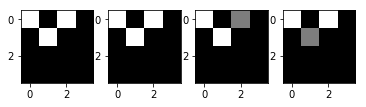

Spaces:  [(0, 1), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Item D, LeftItems: EFGHIJKLMNOP


In [206]:
from Quarto import *
g = Gameboard()
g.apply_moves([((0,0),"A"), ((1,1),"B"),((0,2),"C")])
left = [l for l in"EFGHIJKLMNOP"]
s = Status(g, "D", left)
s.show()

In [208]:
avs = s.get_available_actions()
actimg = s.get_action_image(avs[0])
show_action_image(actimg)

ValueError: too many values to unpack (expected 3)